<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Nov_24_25/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mask1 = df['label']==1
df1 = df[mask1]
df1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41952,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41954,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41960,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mask2 = df['label']==0
df2 = df[mask2]
df2

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df1.shape,df2.shape

((4684, 785), (4132, 785))

In [7]:
data = np.vstack((df1,df2))
data.shape #Ahora tenemos los datos filtrados donde solo aparecen 0 y 1

(8816, 785)

In [27]:
data.shape[0]

8816

In [8]:
num_px = 28

In [34]:
data1 = np.delete(data, 1, 1)
data1.shape[0]

8816

In [10]:
data1 = np.reshape(data1, (8816,28,28))
data1.shape

(8816, 28, 28)

In [36]:
ydata = data1
ydata.shape

(8816, 784)

In [48]:
ydata.T[0].shape

(8816,)

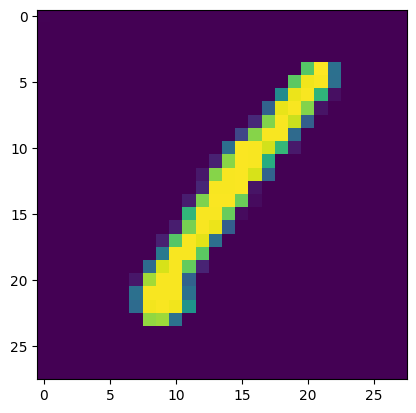

In [11]:
plt.imshow(data1[0])

In [12]:
data1_f = data1.reshape(data1.shape[0], -1).T

In [13]:
data1_f.shape

(784, 8816)

In [14]:
scaler=preprocessing.StandardScaler().fit(data1_f)
X_scaled = scaler.transform(data1_f)
X_scaled.shape

(784, 8816)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled.T,ydata.T[0], test_size=0.10, random_state=42,shuffle= True)

In [50]:
x_train.shape,x_test.shape

((7934, 784), (882, 784))

In [51]:
###Using Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [52]:
tf.random.set_seed(1234)  # applied to achieve reproducible results
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(1, activation='sigmoid', name = 'layer1'),
     ]
)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer='sgd',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [55]:
model.fit(
    x_train,y_train,
    batch_size=20,
    epochs=10,
    validation_split=0.1
)

y_pred_test = model.predict(x_test)
y_pred_test = (y_pred_test >= 0.5).astype(int)
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

Epoch 1/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0222 - binary_accuracy: 0.9947 - val_loss: 0.0133 - val_binary_accuracy: 0.9950
Epoch 2/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0067 - binary_accuracy: 0.9980 - val_loss: 0.0110 - val_binary_accuracy: 0.9962
Epoch 3/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0049 - binary_accuracy: 0.9989 - val_loss: 0.0095 - val_binary_accuracy: 0.9975
Epoch 4/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0040 - binary_accuracy: 0.9989 - val_loss: 0.0089 - val_binary_accuracy: 0.9962
Epoch 5/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0035 - binary_accuracy: 0.9990 - val_loss: 0.0087 - val_binary_accuracy: 0.9962
Epoch 6/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0031 - binary_accuracy: 0.9994 - val_loss: 0.0086 - val_binary_accuracy: 0.9962
Epoch 7/10
357/357 [==============================] - 1s 2ms/ste